In [1]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent

w = world.PDDLWorld('blocks-domain.pddl', 'pddl/blocks_problem_colour1.pddl')
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher)

Parsing domain blocks-domain.pddl
Parsing problem pddl/blocks_problem_colour1.pddl


In [1]:
w.test_success()

NameError: name 'w' is not defined

[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0), (2.5999999999999996, 0)]


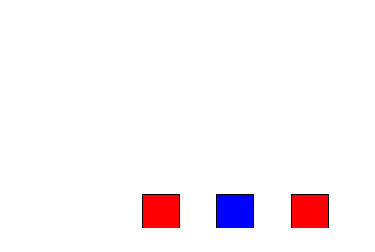

In [2]:
w.draw()

[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0), (2.5999999999999996, 0)]


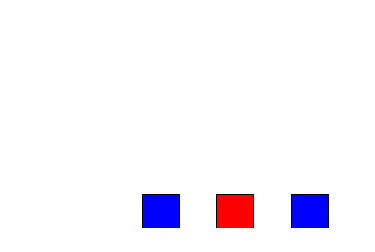

put ['b6', 't0']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0), (0.2, 0)]


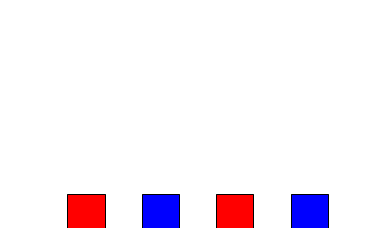

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks
(nan, nan)
R: Is the top object r?
T: no
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0), (2.5999999999999996, 0)]


/Users/mappelgren/Desktop/correcting-agent/prob_model.py:149: RuntimeWarning: invalid value encountered in double_scalars
  return [r0, r1][r]/eta
/Users/mappelgren/miniconda3/envs/phd/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/mappelgren/miniconda3/envs/phd/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


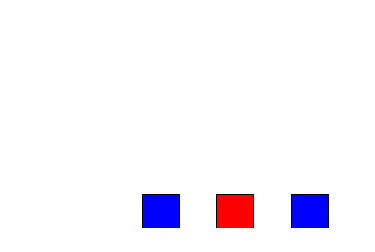

put ['b5', 't0']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (0.2, 0), (2.5999999999999996, 0)]


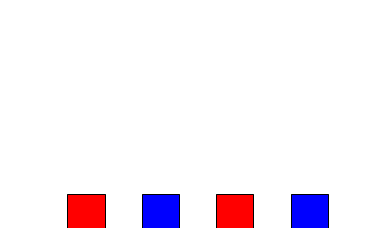

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks
(nan, nan)
R: Is the top object r?
T: no
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (1.7999999999999998, 0), (2.1999999999999997, 0), (2.5999999999999996, 0)]


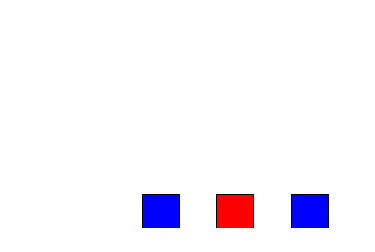

put ['b4', 't0']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (0.2, 0), (2.1999999999999997, 0), (2.5999999999999996, 0)]


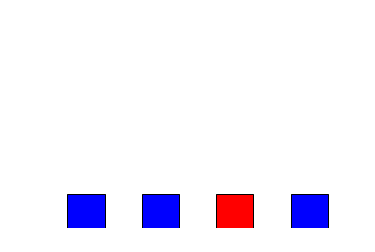

nan nan
nan
put ['b6', 'b4']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (0.2, 0), (2.1999999999999997, 0), (0.2, 0.2)]


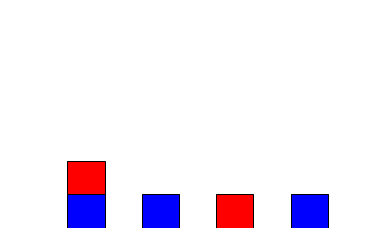

nan nan
nan
put ['b5', 'b6']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (0.2, 0), (0.2, 0.4), (0.2, 0.2)]


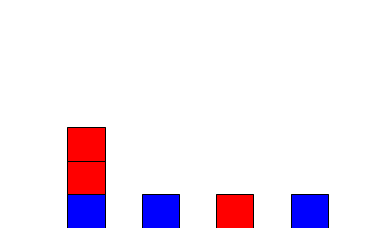

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks
(nan, nan)
R: Is the top object r?
T: no
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (1.4, 0), (0.2, 0), (2.1999999999999997, 0), (0.2, 0.2)]


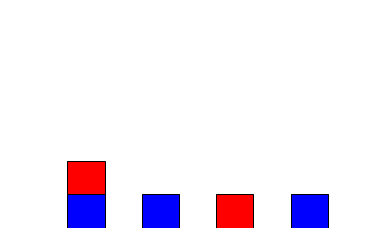

put ['b3', 'b6']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (0.2, 0.4), (0.2, 0), (2.1999999999999997, 0), (0.2, 0.2)]


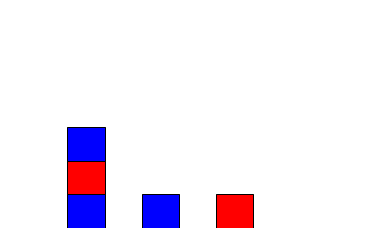

nan nan
nan
put ['b5', 'b3']
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (0.2, 0.4), (0.2, 0), (0.2, 0.6000000000000001), (0.2, 0.2)]


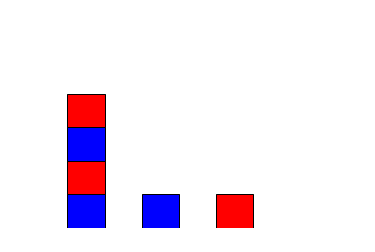

nan nan
nan
put ['b2', 'b5']
[(0.2, 0), (0.6000000000000001, 0), (0.2, 0.8), (0.2, 0.4), (0.2, 0), (0.2, 0.6000000000000001), (0.2, 0.2)]


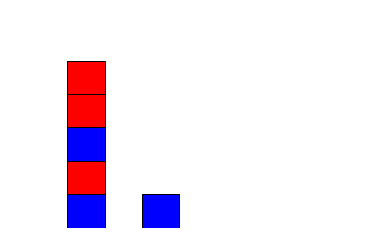

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks
(nan, nan)
R: Is the top object r?
T: no
[(0.2, 0), (0.6000000000000001, 0), (1.0, 0), (0.2, 0.4), (0.2, 0), (0.2, 0.6000000000000001), (0.2, 0.2)]


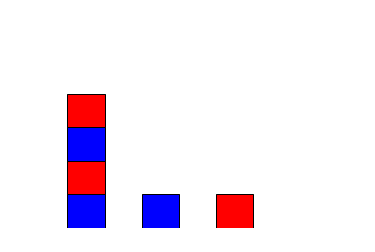

put ['b1', 'b5']
[(0.2, 0), (0.2, 0.8), (1.0, 0), (0.2, 0.4), (0.2, 0), (0.2, 0.6000000000000001), (0.2, 0.2)]


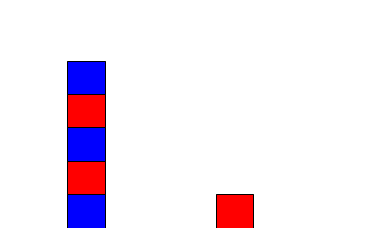

nan nan
nan
put ['b2', 'b1']
[(0.2, 0), (0.2, 0.8), (0.2, 1.0), (0.2, 0.4), (0.2, 0), (0.2, 0.6000000000000001), (0.2, 0.2)]


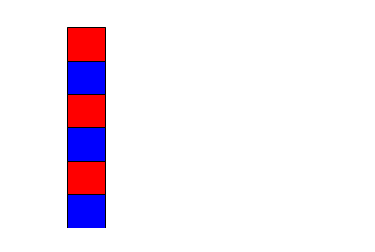

nan nan
nan
DONE


In [2]:
w.draw()
while not w.test_success():

    plan = agent.plan()
    for a, args in plan:
        if a == 'reach-goal':
            break
        w.update(a, args)
        print(a, args)
        w.draw()
        correction = agent.teacher.correction(w)
        if correction:
            print("T:", correction)
            agent.get_correction(correction, a, args)
            w.draw()
            break
        else:
            agent.no_correction(a, args)
            
print('DONE')    

In [4]:
plan

[('put', ['b6', 't0']),
 ('put', ['b5', 'b6']),
 ('put', ['b4', 'b5']),
 ('put', ['b3', 'b4']),
 ('put', ['b2', 'b3']),
 ('put', ['b1', 'b2'])]